

```
# This is formatted as code
```

# Exploratory data analysis (EDA)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#reading data set
HD = pd.read_csv("haberman.csv")


In [ ]:
# know about data: data-points and features
print (HD.shape)

(306, 4)


In [ ]:
#column names in our dataset
print (HD.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [ ]:
#data points for each class

print(HD["status"].value_counts())
HD["status"].head(10)

1    225
2     81
Name: status, dtype: int64


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    2
8    2
9    1
Name: status, dtype: int64

**Observations:**
1. Imbalanced dataset as it contains 74% of class 1 and 26% of class 2



In [ ]:
print(HD.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


**Observations:**
1. All colums are of Dtype integer values
2. But we need to label our class label 'status' in readable format, so let's convert it as 'Positive' if class is 1 and 'Negative' if class is 2.

#  2-D Scatter Plot

Positive    225
Negative     81
Name: status, dtype: int64
0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
5    Positive
6    Positive
7    Negative
8    Negative
9    Positive
Name: status, dtype: object


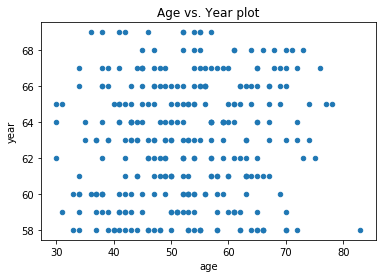

In [ ]:
HD['status'] = HD['status'].map({1:"Positive", 2:"Negative"}) #label mapping
print(HD["status"].value_counts())
print(HD["status"].head(10))
#2-D scatter plot:
HD.plot(kind='scatter', x='age', y='year') ;
plt.title("Age vs. Year plot")
plt.show()

**Observations:**
1. cannot make much sense out it. 
2. let's see by coloring the points by thier class-label.

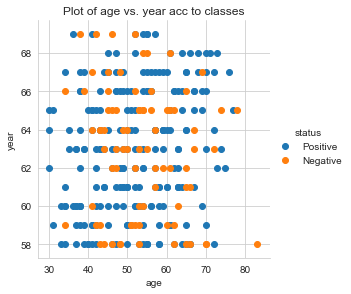

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(HD, hue="status", height=4) \
    .map(plt.scatter, "age", "year") \
    .add_legend();
plt.title('Plot of age vs. year acc to classes');
plt.show();

**Observations:**
1. All Data points are overlapped for features: age vs. year.
2. Consider drawing multiple 2-D scatter plots for each combination of features, we can have 3C2 = 3 plots.

#  Pair-plot

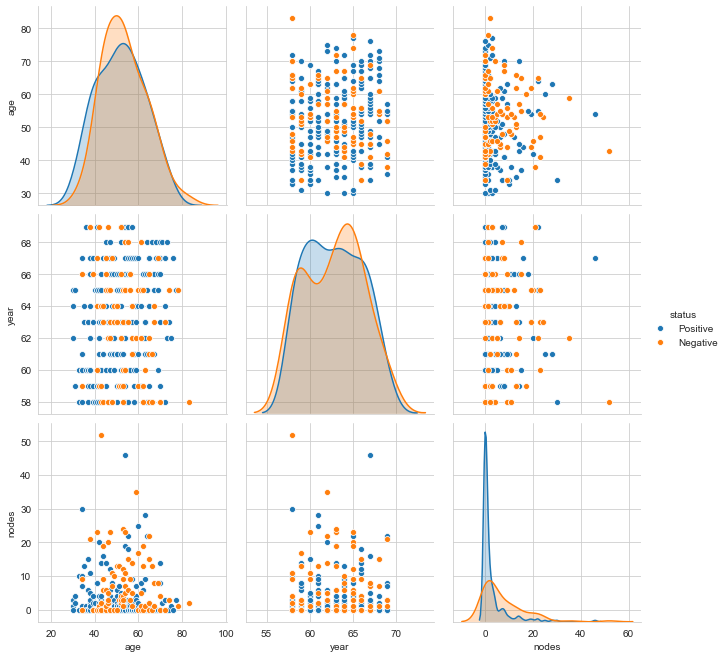

In [ ]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(HD, hue="status", height=3)
plt.show()

**Observations**
1. The diagonals represents the PDF's of each feature and suggests that the featres are overlapped.
2. Every feature has the mixed representation of both the classes. So they are not easily separable.

# Histogram, PDF, CDF

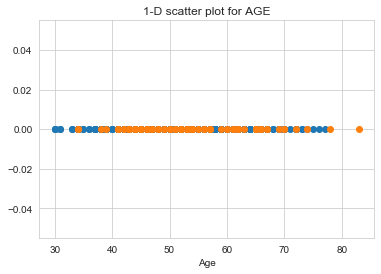

In [ ]:
#1-D scatter plot of Age
import numpy as np

HD_Pos = HD.loc[HD["status"] == 'Positive'];
HD_Neg= HD.loc[HD["status"] == 'Negative'];

plt.plot(HD_Pos["age"], np.zeros_like(HD_Pos['age']), 'o')
plt.plot(HD_Neg["age"], np.zeros_like(HD_Neg['age']), 'o')
plt.xlabel("Age")
plt.title('1-D scatter plot for AGE')
plt.show()

**Observation:**
1. Hard to visualize since data points are overlapping alot.

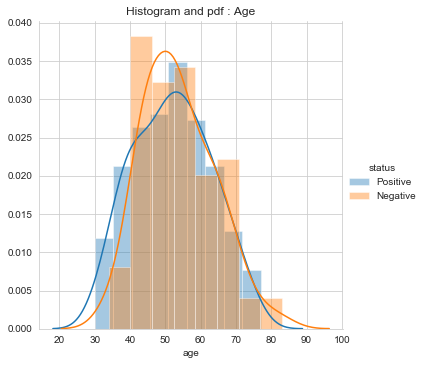

In [ ]:
sns.FacetGrid(HD, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('Histogram and pdf : Age')
plt.show();

**Observation:**
1. Mean of 2 classes is similar

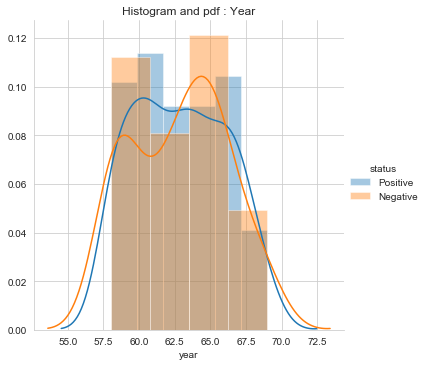

In [ ]:
sns.FacetGrid(HD, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title('Histogram and pdf : Year')
plt.show();

**Observation:**
1. Not useful feature since most of the data is overlapped

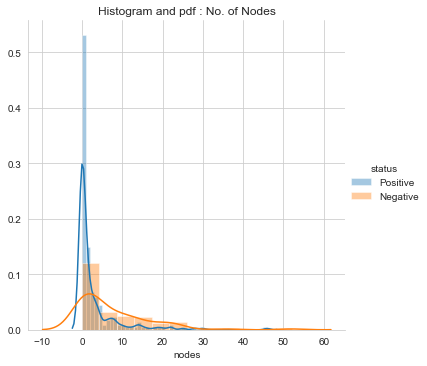

In [ ]:
sns.FacetGrid(HD, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('Histogram and pdf : No. of Nodes')
plt.show();

**Observation:**
1. patients with nodes count less than 3 (2 pdfs intersection point) have high chance of Positive i.e., survived 5 years or longer 

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


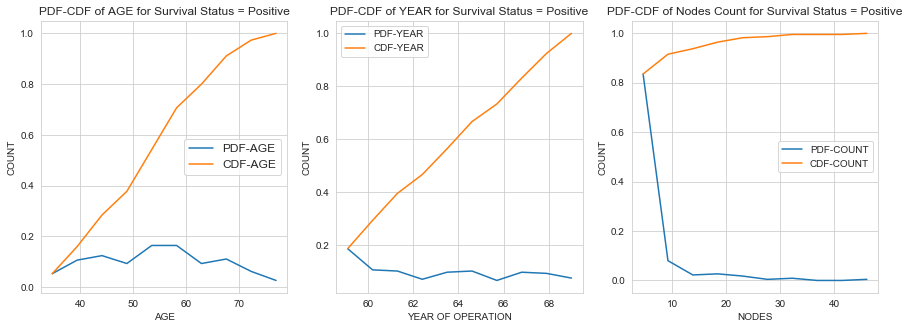

In [ ]:
#Plot CDF of age, year and nodes
plt.figure(figsize=(15,5))
plt.subplot(131)
counts, bin_edges = np.histogram(HD_Pos['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('AGE')
plt.ylabel("COUNT")
plt.title('PDF-CDF of AGE for Survival Status = Positive')
plt.legend(['PDF-AGE', 'CDF-AGE'], loc = 5,prop={'size': 12})

plt.subplot(132)
counts, bin_edges = np.histogram(HD_Pos['year'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('YEAR OF OPERATION')
plt.ylabel("COUNT")
plt.title('PDF-CDF of YEAR for Survival Status = Positive')
plt.legend(['PDF-YEAR', 'CDF-YEAR'])

plt.subplot(133)
counts, bin_edges = np.histogram(HD_Pos['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('NODES')
plt.ylabel("COUNT")
plt.title('PDF-CDF of Nodes Count for Survival Status = Positive')
plt.legend(['PDF-COUNT', 'CDF-COUNT'])
plt.show()

**Observations**
1. There are 90% of Patients, all of whom have Auxillary Nodes less than 10
2. So, we can say nodes is the most important feature to predict the survival status after 5 years.


#  Mean, Variance and Std-dev

In [ ]:
#Mean, Variance, Std-deviation
print("Means of Age for Positive and Negative Classes:")
print(np.mean(HD_Pos["age"]))
print(np.mean(HD_Neg["age"]))

print("\nStd-dev of age for Positive and Negative Classes:");
print(np.std(HD_Pos["age"]))
print(np.std(HD_Neg["age"]))

print("\nMeans of nodes for Positive and Negative Classes:")
print(np.mean(HD_Pos["nodes"]))
print(np.mean(HD_Neg["nodes"]))

print("\nStd-dev of nodes for Positive and Negative Classes:");
print(np.std(HD_Pos["nodes"]))
print(np.std(HD_Neg["nodes"]))


Means of Age for Positive and Negative Classes:
52.01777777777778
53.67901234567901

Std-dev of age for Positive and Negative Classes:
10.98765547510051
10.10418219303131

Means of nodes for Positive and Negative Classes:
2.7911111111111113
7.45679012345679

Std-dev of nodes for Positive and Negative Classes:
5.857258449412131
9.128776076761632


**Observations:**
1. Mean and standard deviation of age for both the classes is similar 
2. On an Average persons with less than 3 nodes are of Positive class i.e, survived 5 or more years and nodes count more than 7 are of Negative Class i.e, suriveved below 5 years.

# Median, Percentile, Quantile, IQR, MAD

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print("--for age:")
print(np.median(HD_Pos["age"]))
print(np.median(HD_Neg["age"]))
print("--for Nodes:")
print(np.median(HD_Pos["nodes"]))
print(np.median(HD_Neg["nodes"]))


print("\nQuantiles:")
print("--for age:")
print(np.percentile(HD_Pos["age"],np.arange(0, 100, 25)))
print(np.percentile(HD_Neg["age"],np.arange(0, 100, 25)))
print("--for Nodes:")
print(np.percentile(HD_Pos["nodes"],np.arange(0, 100, 25)))
print(np.percentile(HD_Neg["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print("--for age:")
print(np.percentile(HD_Pos["age"],90))
print(np.percentile(HD_Neg["age"],90))
print("--for Nodes:")
print(np.percentile(HD_Pos["nodes"],90))
print(np.percentile(HD_Neg["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print("--for age:")
print(robust.mad(HD_Pos["age"]))
print(robust.mad(HD_Neg["age"]))
print("--for Nodes:")
print(robust.mad(HD_Pos["nodes"]))
print(robust.mad(HD_Neg["nodes"]))



Medians:
--for age:
52.0
53.0
--for Nodes:
0.0
4.0

Quantiles:
--for age:
[30. 43. 52. 60.]
[34. 46. 53. 61.]
--for Nodes:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
--for age:
67.0
67.0
--for Nodes:
8.0
20.0

Median Absolute Deviation
--for age:
13.343419966550417
11.860817748044816
--for Nodes:
0.0
5.930408874022408


**Observstion:**
The 90th Percentile for Positive class, 90% of Survivors Have Nodes less than or equal to 8. And for Negative Class, 90% of NonSurvivors have Nodes count as less than or equal to 20

#  Box plot and Whiskers

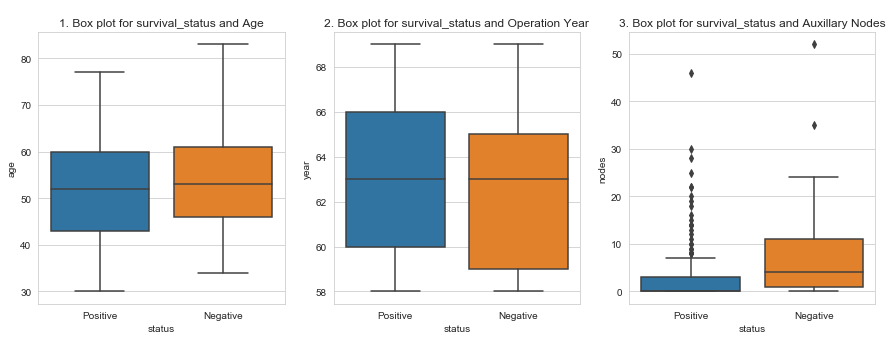

In [ ]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.boxplot(x='status',y='age', data=HD)
plt.title("1. Box plot for survival_status and Age")

plt.subplot(132)
sns.boxplot(x='status',y='year', data=HD)
plt.title("\n2. Box plot for survival_status and Operation Year")

plt.subplot(133)
sns.boxplot(x='status',y='nodes', data=HD)
plt.title("\n3. Box plot for survival_status and Auxillary Nodes")

plt.show()

**Observations:**
1. Plot 1 shows that people who are in age between 30 to 34 survived after the treatment and with age > 77 were not able to survive.
2. Plot 3 shows that the people who survived have 0 to 3 node count. While people who didn't survive for long, fall between 1 to 11. And the 25th and 50th percentiles are overlapped for positive class and also has some extreme points.


# Violin plots

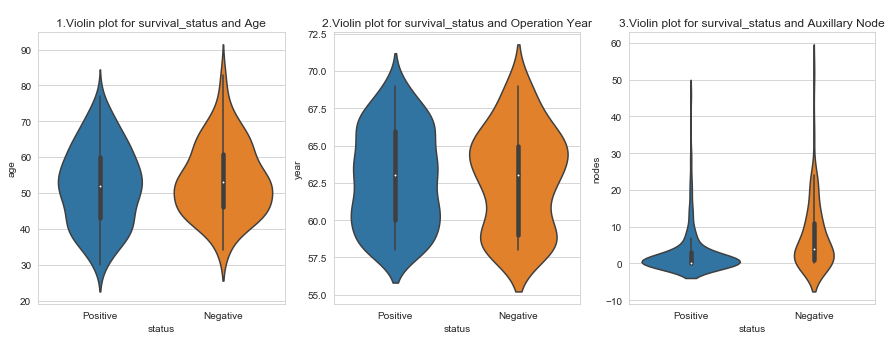

In [ ]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

plt.close()
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.violinplot(x="status", y="age", data=HD, size=8)
plt.title("1.Violin plot for survival_status and Age")

plt.subplot(132)
sns.violinplot(x="status", y="year", data=HD, size=8)
plt.title("\n2.Violin plot for survival_status and Operation Year")

plt.subplot(133)
sns.violinplot(x="status", y="nodes", data=HD, size=8)
plt.title("\n3.Violin plot for survival_status and Auxillary Node")
plt.show()

**Observation:**
    No new information than previous analysis.

# Multivariate probability density, contour plot.


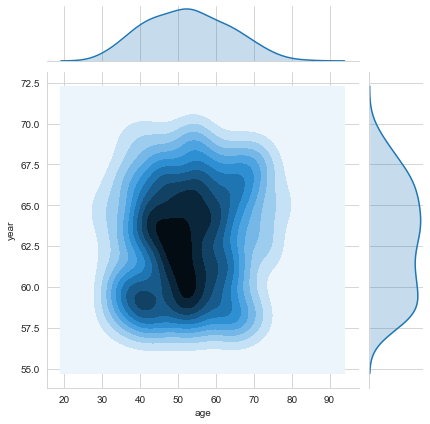

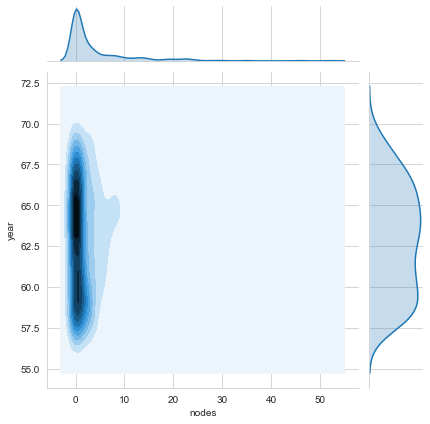

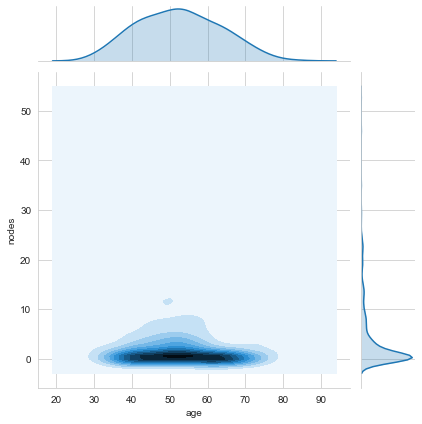

In [ ]:
#2D Density plot, contors-plot

sns.jointplot(x="age", y="year", data=HD, kind="kde");
plt.show();
sns.jointplot(x="nodes", y="year", data=HD, kind="kde");
plt.show();
sns.jointplot(x="age", y="nodes", data=HD, kind="kde");
plt.show();


# Conclusions:


1. It is a binary classification problem and the dataset is imbalanced as 74% of data is class1 26% is of class2.
2. Among the 3 (the patient's age, year of operation and the number of positive auxillary nodes) featues, Year doesnt seem to have any impact, Age seem to have a little effect and Nodes is a necessary feature in this dataset.
3. Pair Plots implies that they are not linearly Separable as most of the data-points are overlapped. 
4. Nodes feature only is giving some intution. So we can't build a simple if-else conditioned model, instead it require some more features or more complex technique to build a model to classify.
